In [1]:
from __future__ import division, print_function
from tensorflow.python.keras.layers.core import Dense
from tensorflow.python.keras.layers import Dense,BatchNormalization
from tensorflow.python.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import math
import os
import matplotlib.pyplot as plt


In [2]:
data = np.load('../fac_cond256_unit8.npz')
raw_X=data['cond']
raw_X=np.squeeze(raw_X)
raw_Y=data['fac'][0:,2]
raw_Y=raw_Y.astype(np.float64)
raw_Y=np.expand_dims(raw_Y,-1)
NUM_TIMESTEPS = 65
BATCH_SIZE = 256   
NUM_EPOCHS = 3000
Xtrain=raw_X[:-1000]
Ytrain=raw_Y[:-1000]
Xtest=raw_X[-1000:]
Ytest=raw_Y[-1000:]


In [3]:
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)

(2000, 65) (1000, 65) (2000, 1) (1000, 1)


In [4]:
model = Sequential()
model.add(Dense(64,activation= 'sigmoid',input_shape=(65,)))
model.add(Dense(128,activation= 'sigmoid'))
model.add(Dense(256,activation= 'sigmoid'))
model.add(Dense(100,activation= 'sigmoid'))
model.add(Dense(1))
model.summary()

model.compile(loss="mean_squared_error", optimizer="adam", metrics=["mean_squared_error"])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                4224      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               25700     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 71,369
Trainable params: 71,369
Non-trainable params: 0
_________________________________________________________________


In [5]:
history=model.fit(Xtrain, Ytrain, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_data=(Xtest, Ytest),shuffle=True)
score, _ = model.evaluate(Xtest, Ytest, batch_size=BATCH_SIZE)
rmse = math.sqrt(score)

 

Epoch 1/3000
8/8 [==============================] - 0s 14ms/step - loss: 0.0860 - mean_squared_error: 0.0860 - val_loss: 0.0700 - val_mean_squared_error: 0.0700
Epoch 2/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.0284 - mean_squared_error: 0.0284 - val_loss: 0.0023 - val_mean_squared_error: 0.0023
Epoch 3/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0061 - val_mean_squared_error: 0.0061
Epoch 4/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.0053 - mean_squared_error: 0.0053 - val_loss: 0.0052 - val_mean_squared_error: 0.0052
Epoch 5/3000
8/8 [==============================] - 0s 4ms/step - loss: 0.0022 - mean_squared_error: 0.0022 - val_loss: 7.5788e-05 - val_mean_squared_error: 7.5788e-05
Epoch 6/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.3467e-04 - mean_squared_error: 8.3467e-04 - val_loss: 0.0012 - val_mean_squared_error: 0.0012
Epoch 7/3000
8/8 [=====

Epoch 48/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.8038e-05 - mean_squared_error: 7.8038e-05 - val_loss: 7.9947e-05 - val_mean_squared_error: 7.9947e-05
Epoch 49/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.5556e-05 - mean_squared_error: 7.5556e-05 - val_loss: 7.5710e-05 - val_mean_squared_error: 7.5710e-05
Epoch 50/3000
8/8 [==============================] - 0s 6ms/step - loss: 7.5888e-05 - mean_squared_error: 7.5888e-05 - val_loss: 7.5289e-05 - val_mean_squared_error: 7.5289e-05
Epoch 51/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.6843e-05 - mean_squared_error: 7.6843e-05 - val_loss: 7.5058e-05 - val_mean_squared_error: 7.5058e-05
Epoch 52/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.6007e-05 - mean_squared_error: 7.6007e-05 - val_loss: 7.7166e-05 - val_mean_squared_error: 7.7166e-05
Epoch 53/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.6548e-05 - mean_squared_error: 7.6548e-0

8/8 [==============================] - 0s 4ms/step - loss: 7.9541e-05 - mean_squared_error: 7.9541e-05 - val_loss: 9.3923e-05 - val_mean_squared_error: 9.3923e-05
Epoch 95/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.8607e-05 - mean_squared_error: 8.8607e-05 - val_loss: 7.6869e-05 - val_mean_squared_error: 7.6869e-05
Epoch 96/3000
8/8 [==============================] - 0s 5ms/step - loss: 8.2781e-05 - mean_squared_error: 8.2781e-05 - val_loss: 9.7249e-05 - val_mean_squared_error: 9.7249e-05
Epoch 97/3000
8/8 [==============================] - 0s 5ms/step - loss: 9.6984e-05 - mean_squared_error: 9.6984e-05 - val_loss: 8.2299e-05 - val_mean_squared_error: 8.2299e-05
Epoch 98/3000
8/8 [==============================] - 0s 5ms/step - loss: 8.6967e-05 - mean_squared_error: 8.6967e-05 - val_loss: 7.9510e-05 - val_mean_squared_error: 7.9510e-05
Epoch 99/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.7967e-05 - mean_squared_error: 7.7967e-05 - val_loss: 

8/8 [==============================] - 0s 4ms/step - loss: 9.1425e-05 - mean_squared_error: 9.1425e-05 - val_loss: 8.3191e-05 - val_mean_squared_error: 8.3191e-05
Epoch 141/3000
8/8 [==============================] - 0s 4ms/step - loss: 9.6887e-05 - mean_squared_error: 9.6887e-05 - val_loss: 7.6015e-05 - val_mean_squared_error: 7.6015e-05
Epoch 142/3000
8/8 [==============================] - 0s 3ms/step - loss: 8.5553e-05 - mean_squared_error: 8.5553e-05 - val_loss: 7.9582e-05 - val_mean_squared_error: 7.9582e-05
Epoch 143/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.4173e-05 - mean_squared_error: 8.4173e-05 - val_loss: 7.4733e-05 - val_mean_squared_error: 7.4733e-05
Epoch 144/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.6567e-05 - mean_squared_error: 7.6567e-05 - val_loss: 7.4914e-05 - val_mean_squared_error: 7.4914e-05
Epoch 145/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.7303e-05 - mean_squared_error: 7.7303e-05 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 1.0313e-04 - mean_squared_error: 1.0313e-04 - val_loss: 8.2523e-05 - val_mean_squared_error: 8.2523e-05
Epoch 187/3000
8/8 [==============================] - 0s 4ms/step - loss: 9.2994e-05 - mean_squared_error: 9.2994e-05 - val_loss: 8.6294e-05 - val_mean_squared_error: 8.6294e-05
Epoch 188/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.5108e-05 - mean_squared_error: 8.5108e-05 - val_loss: 7.7423e-05 - val_mean_squared_error: 7.7423e-05
Epoch 189/3000
8/8 [==============================] - 0s 4ms/step - loss: 9.6403e-05 - mean_squared_error: 9.6403e-05 - val_loss: 7.6605e-05 - val_mean_squared_error: 7.6605e-05
Epoch 190/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.9487e-05 - mean_squared_error: 8.9487e-05 - val_loss: 7.8294e-05 - val_mean_squared_error: 7.8294e-05
Epoch 191/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.0476e-04 - mean_squared_error: 1.0476e-04 - val_l

8/8 [==============================] - 0s 3ms/step - loss: 9.0346e-05 - mean_squared_error: 9.0346e-05 - val_loss: 7.4893e-05 - val_mean_squared_error: 7.4893e-05
Epoch 233/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.8901e-05 - mean_squared_error: 7.8901e-05 - val_loss: 7.7341e-05 - val_mean_squared_error: 7.7341e-05
Epoch 234/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.8292e-05 - mean_squared_error: 8.8292e-05 - val_loss: 7.7106e-05 - val_mean_squared_error: 7.7106e-05
Epoch 235/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.3200e-04 - mean_squared_error: 1.3200e-04 - val_loss: 8.1197e-05 - val_mean_squared_error: 8.1197e-05
Epoch 236/3000
8/8 [==============================] - 0s 4ms/step - loss: 9.0376e-05 - mean_squared_error: 9.0376e-05 - val_loss: 7.4518e-05 - val_mean_squared_error: 7.4518e-05
Epoch 237/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.4126e-05 - mean_squared_error: 8.4126e-05 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 9.9663e-05 - mean_squared_error: 9.9663e-05 - val_loss: 1.7132e-04 - val_mean_squared_error: 1.7132e-04
Epoch 279/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.3398e-04 - mean_squared_error: 1.3398e-04 - val_loss: 7.5546e-05 - val_mean_squared_error: 7.5546e-05
Epoch 280/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.2479e-04 - mean_squared_error: 1.2479e-04 - val_loss: 2.6317e-04 - val_mean_squared_error: 2.6317e-04
Epoch 281/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.2586e-04 - mean_squared_error: 1.2586e-04 - val_loss: 7.4720e-05 - val_mean_squared_error: 7.4720e-05
Epoch 282/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.5771e-05 - mean_squared_error: 7.5771e-05 - val_loss: 9.5952e-05 - val_mean_squared_error: 9.5952e-05
Epoch 283/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.1528e-04 - mean_squared_error: 1.1528e-04 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 9.9953e-05 - mean_squared_error: 9.9953e-05 - val_loss: 7.6031e-05 - val_mean_squared_error: 7.6031e-05
Epoch 325/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.5072e-04 - mean_squared_error: 1.5072e-04 - val_loss: 1.9339e-04 - val_mean_squared_error: 1.9339e-04
Epoch 326/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.1345e-04 - mean_squared_error: 1.1345e-04 - val_loss: 1.3323e-04 - val_mean_squared_error: 1.3323e-04
Epoch 327/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.4272e-04 - mean_squared_error: 1.4272e-04 - val_loss: 3.6066e-04 - val_mean_squared_error: 3.6066e-04
Epoch 328/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.6754e-04 - mean_squared_error: 1.6754e-04 - val_loss: 8.0811e-05 - val_mean_squared_error: 8.0811e-05
Epoch 329/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.8488e-04 - mean_squared_error: 1.8488e-04 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 1.4827e-04 - mean_squared_error: 1.4827e-04 - val_loss: 8.0801e-05 - val_mean_squared_error: 8.0801e-05
Epoch 371/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.7922e-05 - mean_squared_error: 7.7922e-05 - val_loss: 7.6686e-05 - val_mean_squared_error: 7.6686e-05
Epoch 372/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.2364e-04 - mean_squared_error: 1.2364e-04 - val_loss: 1.8756e-04 - val_mean_squared_error: 1.8756e-04
Epoch 373/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.5230e-04 - mean_squared_error: 1.5230e-04 - val_loss: 2.5652e-04 - val_mean_squared_error: 2.5652e-04
Epoch 374/3000
8/8 [==============================] - 0s 3ms/step - loss: 2.4192e-04 - mean_squared_error: 2.4192e-04 - val_loss: 1.2036e-04 - val_mean_squared_error: 1.2036e-04
Epoch 375/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.3418e-04 - mean_squared_error: 1.3418e-04 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 8.4187e-05 - mean_squared_error: 8.4187e-05 - val_loss: 7.6827e-05 - val_mean_squared_error: 7.6827e-05
Epoch 417/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.9454e-05 - mean_squared_error: 8.9454e-05 - val_loss: 1.2010e-04 - val_mean_squared_error: 1.2010e-04
Epoch 418/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.1669e-04 - mean_squared_error: 1.1669e-04 - val_loss: 1.1638e-04 - val_mean_squared_error: 1.1638e-04
Epoch 419/3000
8/8 [==============================] - 0s 5ms/step - loss: 1.7166e-04 - mean_squared_error: 1.7166e-04 - val_loss: 1.5314e-04 - val_mean_squared_error: 1.5314e-04
Epoch 420/3000
8/8 [==============================] - 0s 5ms/step - loss: 1.1662e-04 - mean_squared_error: 1.1662e-04 - val_loss: 9.0745e-05 - val_mean_squared_error: 9.0745e-05
Epoch 421/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.0910e-04 - mean_squared_error: 1.0910e-04 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 2.2183e-04 - mean_squared_error: 2.2183e-04 - val_loss: 1.3658e-04 - val_mean_squared_error: 1.3658e-04
Epoch 463/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.4055e-04 - mean_squared_error: 1.4055e-04 - val_loss: 2.3792e-04 - val_mean_squared_error: 2.3792e-04
Epoch 464/3000
8/8 [==============================] - 0s 4ms/step - loss: 3.0152e-04 - mean_squared_error: 3.0152e-04 - val_loss: 2.3748e-04 - val_mean_squared_error: 2.3748e-04
Epoch 465/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.5719e-04 - mean_squared_error: 1.5719e-04 - val_loss: 1.2973e-04 - val_mean_squared_error: 1.2973e-04
Epoch 466/3000
8/8 [==============================] - 0s 4ms/step - loss: 9.3825e-05 - mean_squared_error: 9.3825e-05 - val_loss: 7.4563e-05 - val_mean_squared_error: 7.4563e-05
Epoch 467/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.4192e-05 - mean_squared_error: 8.4192e-05 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 1.4328e-04 - mean_squared_error: 1.4328e-04 - val_loss: 7.5898e-05 - val_mean_squared_error: 7.5898e-05
Epoch 509/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.2208e-04 - mean_squared_error: 2.2208e-04 - val_loss: 1.7743e-04 - val_mean_squared_error: 1.7743e-04
Epoch 510/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.3036e-04 - mean_squared_error: 1.3036e-04 - val_loss: 8.7088e-05 - val_mean_squared_error: 8.7088e-05
Epoch 511/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.2601e-04 - mean_squared_error: 1.2601e-04 - val_loss: 8.8870e-05 - val_mean_squared_error: 8.8870e-05
Epoch 512/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.7713e-05 - mean_squared_error: 7.7713e-05 - val_loss: 1.2422e-04 - val_mean_squared_error: 1.2422e-04
Epoch 513/3000
8/8 [==============================] - 0s 4ms/step - loss: 9.0575e-05 - mean_squared_error: 9.0575e-05 - val_l

8/8 [==============================] - 0s 3ms/step - loss: 2.4239e-04 - mean_squared_error: 2.4239e-04 - val_loss: 2.9258e-04 - val_mean_squared_error: 2.9258e-04
Epoch 555/3000
8/8 [==============================] - 0s 3ms/step - loss: 2.5001e-04 - mean_squared_error: 2.5001e-04 - val_loss: 4.0733e-04 - val_mean_squared_error: 4.0733e-04
Epoch 556/3000
8/8 [==============================] - 0s 3ms/step - loss: 3.1840e-04 - mean_squared_error: 3.1840e-04 - val_loss: 1.3528e-04 - val_mean_squared_error: 1.3528e-04
Epoch 557/3000
8/8 [==============================] - 0s 4ms/step - loss: 2.1005e-04 - mean_squared_error: 2.1005e-04 - val_loss: 1.9935e-04 - val_mean_squared_error: 1.9935e-04
Epoch 558/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.2246e-04 - mean_squared_error: 1.2246e-04 - val_loss: 7.6783e-05 - val_mean_squared_error: 7.6783e-05
Epoch 559/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.0515e-04 - mean_squared_error: 1.0515e-04 - val_l

8/8 [==============================] - 0s 3ms/step - loss: 3.2553e-04 - mean_squared_error: 3.2553e-04 - val_loss: 2.0870e-04 - val_mean_squared_error: 2.0870e-04
Epoch 601/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.1151e-04 - mean_squared_error: 1.1151e-04 - val_loss: 1.0061e-04 - val_mean_squared_error: 1.0061e-04
Epoch 602/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.0702e-04 - mean_squared_error: 1.0702e-04 - val_loss: 1.7332e-04 - val_mean_squared_error: 1.7332e-04
Epoch 603/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.2693e-04 - mean_squared_error: 1.2693e-04 - val_loss: 9.6862e-05 - val_mean_squared_error: 9.6862e-05
Epoch 604/3000
8/8 [==============================] - 0s 3ms/step - loss: 8.9858e-05 - mean_squared_error: 8.9858e-05 - val_loss: 8.5388e-05 - val_mean_squared_error: 8.5388e-05
Epoch 605/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0980e-04 - mean_squared_error: 1.0980e-04 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 1.2544e-04 - mean_squared_error: 1.2544e-04 - val_loss: 1.3709e-04 - val_mean_squared_error: 1.3709e-04
Epoch 647/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.6146e-04 - mean_squared_error: 1.6146e-04 - val_loss: 7.7971e-05 - val_mean_squared_error: 7.7971e-05
Epoch 648/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.3088e-04 - mean_squared_error: 1.3088e-04 - val_loss: 7.3915e-05 - val_mean_squared_error: 7.3915e-05
Epoch 649/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.7970e-05 - mean_squared_error: 7.7970e-05 - val_loss: 7.7747e-05 - val_mean_squared_error: 7.7747e-05
Epoch 650/3000
8/8 [==============================] - 0s 4ms/step - loss: 9.9153e-05 - mean_squared_error: 9.9153e-05 - val_loss: 1.6838e-04 - val_mean_squared_error: 1.6838e-04
Epoch 651/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.8480e-04 - mean_squared_error: 1.8480e-04 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 1.0004e-04 - mean_squared_error: 1.0004e-04 - val_loss: 7.6578e-05 - val_mean_squared_error: 7.6578e-05
Epoch 693/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.5712e-05 - mean_squared_error: 8.5712e-05 - val_loss: 9.0145e-05 - val_mean_squared_error: 9.0145e-05
Epoch 694/3000
8/8 [==============================] - 0s 4ms/step - loss: 9.5503e-05 - mean_squared_error: 9.5503e-05 - val_loss: 1.8668e-04 - val_mean_squared_error: 1.8668e-04
Epoch 695/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.1894e-04 - mean_squared_error: 1.1894e-04 - val_loss: 1.0126e-04 - val_mean_squared_error: 1.0126e-04
Epoch 696/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.2044e-04 - mean_squared_error: 1.2044e-04 - val_loss: 1.2028e-04 - val_mean_squared_error: 1.2028e-04
Epoch 697/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.0640e-04 - mean_squared_error: 1.0640e-04 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 1.0556e-04 - mean_squared_error: 1.0556e-04 - val_loss: 1.2114e-04 - val_mean_squared_error: 1.2114e-04
Epoch 739/3000
8/8 [==============================] - 0s 4ms/step - loss: 9.1646e-05 - mean_squared_error: 9.1646e-05 - val_loss: 7.4081e-05 - val_mean_squared_error: 7.4081e-05
Epoch 740/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0956e-04 - mean_squared_error: 1.0956e-04 - val_loss: 9.6638e-05 - val_mean_squared_error: 9.6638e-05
Epoch 741/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.0769e-04 - mean_squared_error: 1.0769e-04 - val_loss: 9.2370e-05 - val_mean_squared_error: 9.2370e-05
Epoch 742/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.7295e-05 - mean_squared_error: 8.7295e-05 - val_loss: 7.3850e-05 - val_mean_squared_error: 7.3850e-05
Epoch 743/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.3923e-05 - mean_squared_error: 7.3923e-05 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 8.6332e-05 - mean_squared_error: 8.6332e-05 - val_loss: 1.1849e-04 - val_mean_squared_error: 1.1849e-04
Epoch 785/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.5119e-04 - mean_squared_error: 1.5119e-04 - val_loss: 1.3286e-04 - val_mean_squared_error: 1.3286e-04
Epoch 786/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.4398e-04 - mean_squared_error: 1.4398e-04 - val_loss: 7.4759e-05 - val_mean_squared_error: 7.4759e-05
Epoch 787/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.5482e-04 - mean_squared_error: 1.5482e-04 - val_loss: 1.1744e-04 - val_mean_squared_error: 1.1744e-04
Epoch 788/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.9809e-05 - mean_squared_error: 8.9809e-05 - val_loss: 7.5942e-05 - val_mean_squared_error: 7.5942e-05
Epoch 789/3000
8/8 [==============================] - 0s 4ms/step - loss: 9.4103e-05 - mean_squared_error: 9.4103e-05 - val_l

Epoch 830/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.3500e-04 - mean_squared_error: 1.3500e-04 - val_loss: 2.0656e-04 - val_mean_squared_error: 2.0656e-04
Epoch 831/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.4784e-04 - mean_squared_error: 1.4784e-04 - val_loss: 8.0286e-05 - val_mean_squared_error: 8.0286e-05
Epoch 832/3000
8/8 [==============================] - 0s 4ms/step - loss: 9.4954e-05 - mean_squared_error: 9.4954e-05 - val_loss: 7.6189e-05 - val_mean_squared_error: 7.6189e-05
Epoch 833/3000
8/8 [==============================] - 0s 4ms/step - loss: 9.1326e-05 - mean_squared_error: 9.1326e-05 - val_loss: 8.4453e-05 - val_mean_squared_error: 8.4453e-05
Epoch 834/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.0752e-05 - mean_squared_error: 8.0752e-05 - val_loss: 8.1869e-05 - val_mean_squared_error: 8.1869e-05
Epoch 835/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.6700e-05 - mean_squared_error: 8.6

8/8 [==============================] - 0s 4ms/step - loss: 1.5135e-04 - mean_squared_error: 1.5135e-04 - val_loss: 7.4972e-05 - val_mean_squared_error: 7.4972e-05
Epoch 877/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.7155e-05 - mean_squared_error: 7.7155e-05 - val_loss: 1.0365e-04 - val_mean_squared_error: 1.0365e-04
Epoch 878/3000
8/8 [==============================] - 0s 4ms/step - loss: 9.2168e-05 - mean_squared_error: 9.2168e-05 - val_loss: 7.6438e-05 - val_mean_squared_error: 7.6438e-05
Epoch 879/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.6359e-05 - mean_squared_error: 7.6359e-05 - val_loss: 7.4112e-05 - val_mean_squared_error: 7.4112e-05
Epoch 880/3000
8/8 [==============================] - 0s 5ms/step - loss: 7.4690e-05 - mean_squared_error: 7.4690e-05 - val_loss: 8.0291e-05 - val_mean_squared_error: 8.0291e-05
Epoch 881/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.0533e-04 - mean_squared_error: 1.0533e-04 - val_l

8/8 [==============================] - 0s 3ms/step - loss: 8.5053e-05 - mean_squared_error: 8.5053e-05 - val_loss: 1.0334e-04 - val_mean_squared_error: 1.0334e-04
Epoch 923/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.1210e-04 - mean_squared_error: 1.1210e-04 - val_loss: 2.3006e-04 - val_mean_squared_error: 2.3006e-04
Epoch 924/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.4052e-04 - mean_squared_error: 1.4052e-04 - val_loss: 1.0326e-04 - val_mean_squared_error: 1.0326e-04
Epoch 925/3000
8/8 [==============================] - 0s 4ms/step - loss: 9.3453e-05 - mean_squared_error: 9.3453e-05 - val_loss: 8.9709e-05 - val_mean_squared_error: 8.9709e-05
Epoch 926/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.0165e-04 - mean_squared_error: 1.0165e-04 - val_loss: 8.3955e-05 - val_mean_squared_error: 8.3955e-05
Epoch 927/3000
8/8 [==============================] - 0s 4ms/step - loss: 9.3737e-05 - mean_squared_error: 9.3737e-05 - val_l

8/8 [==============================] - 0s 5ms/step - loss: 1.0438e-04 - mean_squared_error: 1.0438e-04 - val_loss: 9.8597e-05 - val_mean_squared_error: 9.8597e-05
Epoch 969/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.2056e-04 - mean_squared_error: 1.2056e-04 - val_loss: 1.0295e-04 - val_mean_squared_error: 1.0295e-04
Epoch 970/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.3443e-04 - mean_squared_error: 1.3443e-04 - val_loss: 9.0722e-05 - val_mean_squared_error: 9.0722e-05
Epoch 971/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.1532e-04 - mean_squared_error: 1.1532e-04 - val_loss: 7.4940e-05 - val_mean_squared_error: 7.4940e-05
Epoch 972/3000
8/8 [==============================] - 0s 3ms/step - loss: 9.1557e-05 - mean_squared_error: 9.1557e-05 - val_loss: 7.6327e-05 - val_mean_squared_error: 7.6327e-05
Epoch 973/3000
8/8 [==============================] - 0s 3ms/step - loss: 8.2285e-05 - mean_squared_error: 8.2285e-05 - val_l

8/8 [==============================] - 0s 4ms/step - loss: 9.5759e-05 - mean_squared_error: 9.5759e-05 - val_loss: 1.2610e-04 - val_mean_squared_error: 1.2610e-04
Epoch 1015/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.2894e-04 - mean_squared_error: 1.2894e-04 - val_loss: 8.1768e-05 - val_mean_squared_error: 8.1768e-05
Epoch 1016/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.4747e-05 - mean_squared_error: 8.4747e-05 - val_loss: 7.3645e-05 - val_mean_squared_error: 7.3645e-05
Epoch 1017/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.5598e-05 - mean_squared_error: 7.5598e-05 - val_loss: 7.3603e-05 - val_mean_squared_error: 7.3603e-05
Epoch 1018/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.6297e-05 - mean_squared_error: 7.6297e-05 - val_loss: 7.7826e-05 - val_mean_squared_error: 7.7826e-05
Epoch 1019/3000
8/8 [==============================] - 0s 4ms/step - loss: 9.0706e-05 - mean_squared_error: 9.0706e-05 - 

Epoch 1060/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.5808e-05 - mean_squared_error: 8.5808e-05 - val_loss: 7.4398e-05 - val_mean_squared_error: 7.4398e-05
Epoch 1061/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.2907e-05 - mean_squared_error: 8.2907e-05 - val_loss: 7.4425e-05 - val_mean_squared_error: 7.4425e-05
Epoch 1062/3000
8/8 [==============================] - 0s 5ms/step - loss: 9.1132e-05 - mean_squared_error: 9.1132e-05 - val_loss: 8.3360e-05 - val_mean_squared_error: 8.3360e-05
Epoch 1063/3000
8/8 [==============================] - 0s 5ms/step - loss: 8.4220e-05 - mean_squared_error: 8.4220e-05 - val_loss: 1.2939e-04 - val_mean_squared_error: 1.2939e-04
Epoch 1064/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.2414e-04 - mean_squared_error: 1.2414e-04 - val_loss: 9.4824e-05 - val_mean_squared_error: 9.4824e-05
Epoch 1065/3000
8/8 [==============================] - 0s 5ms/step - loss: 9.5872e-05 - mean_squared_erro

Epoch 1106/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.3944e-05 - mean_squared_error: 8.3944e-05 - val_loss: 7.3551e-05 - val_mean_squared_error: 7.3551e-05
Epoch 1107/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.6769e-05 - mean_squared_error: 7.6769e-05 - val_loss: 8.0362e-05 - val_mean_squared_error: 8.0362e-05
Epoch 1108/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.7315e-05 - mean_squared_error: 7.7315e-05 - val_loss: 7.8615e-05 - val_mean_squared_error: 7.8615e-05
Epoch 1109/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.1643e-05 - mean_squared_error: 8.1643e-05 - val_loss: 8.1966e-05 - val_mean_squared_error: 8.1966e-05
Epoch 1110/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.5815e-05 - mean_squared_error: 8.5815e-05 - val_loss: 7.3733e-05 - val_mean_squared_error: 7.3733e-05
Epoch 1111/3000
8/8 [==============================] - 0s 4ms/step - loss: 9.4432e-05 - mean_squared_erro

Epoch 1152/3000
8/8 [==============================] - 0s 3ms/step - loss: 8.4767e-05 - mean_squared_error: 8.4767e-05 - val_loss: 7.3964e-05 - val_mean_squared_error: 7.3964e-05
Epoch 1153/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.7611e-05 - mean_squared_error: 7.7611e-05 - val_loss: 7.5658e-05 - val_mean_squared_error: 7.5658e-05
Epoch 1154/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.8320e-05 - mean_squared_error: 7.8320e-05 - val_loss: 1.0787e-04 - val_mean_squared_error: 1.0787e-04
Epoch 1155/3000
8/8 [==============================] - 0s 4ms/step - loss: 9.1336e-05 - mean_squared_error: 9.1336e-05 - val_loss: 7.5082e-05 - val_mean_squared_error: 7.5082e-05
Epoch 1156/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.4073e-05 - mean_squared_error: 8.4073e-05 - val_loss: 7.6367e-05 - val_mean_squared_error: 7.6367e-05
Epoch 1157/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.8695e-05 - mean_squared_erro

Epoch 1198/3000
8/8 [==============================] - 0s 3ms/step - loss: 8.3731e-05 - mean_squared_error: 8.3731e-05 - val_loss: 8.0153e-05 - val_mean_squared_error: 8.0153e-05
Epoch 1199/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.0549e-05 - mean_squared_error: 8.0549e-05 - val_loss: 7.9607e-05 - val_mean_squared_error: 7.9607e-05
Epoch 1200/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.1169e-05 - mean_squared_error: 8.1169e-05 - val_loss: 7.7255e-05 - val_mean_squared_error: 7.7255e-05
Epoch 1201/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.5882e-05 - mean_squared_error: 7.5882e-05 - val_loss: 8.1766e-05 - val_mean_squared_error: 8.1766e-05
Epoch 1202/3000
8/8 [==============================] - 0s 3ms/step - loss: 8.2148e-05 - mean_squared_error: 8.2148e-05 - val_loss: 7.3361e-05 - val_mean_squared_error: 7.3361e-05
Epoch 1203/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.9331e-05 - mean_squared_erro

Epoch 1244/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.0936e-04 - mean_squared_error: 1.0936e-04 - val_loss: 1.0157e-04 - val_mean_squared_error: 1.0157e-04
Epoch 1245/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.3578e-04 - mean_squared_error: 1.3578e-04 - val_loss: 2.2670e-04 - val_mean_squared_error: 2.2670e-04
Epoch 1246/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.5390e-04 - mean_squared_error: 1.5390e-04 - val_loss: 7.4524e-05 - val_mean_squared_error: 7.4524e-05
Epoch 1247/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.0311e-04 - mean_squared_error: 1.0311e-04 - val_loss: 7.4365e-05 - val_mean_squared_error: 7.4365e-05
Epoch 1248/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0798e-04 - mean_squared_error: 1.0798e-04 - val_loss: 9.7195e-05 - val_mean_squared_error: 9.7195e-05
Epoch 1249/3000
8/8 [==============================] - 0s 3ms/step - loss: 9.1001e-05 - mean_squared_erro

Epoch 1290/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.8791e-05 - mean_squared_error: 8.8791e-05 - val_loss: 8.0596e-05 - val_mean_squared_error: 8.0596e-05
Epoch 1291/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.2780e-05 - mean_squared_error: 8.2780e-05 - val_loss: 1.0544e-04 - val_mean_squared_error: 1.0544e-04
Epoch 1292/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.0277e-04 - mean_squared_error: 1.0277e-04 - val_loss: 8.0220e-05 - val_mean_squared_error: 8.0220e-05
Epoch 1293/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.1187e-04 - mean_squared_error: 1.1187e-04 - val_loss: 9.4661e-05 - val_mean_squared_error: 9.4661e-05
Epoch 1294/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.3863e-04 - mean_squared_error: 1.3863e-04 - val_loss: 1.8171e-04 - val_mean_squared_error: 1.8171e-04
Epoch 1295/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.1049e-04 - mean_squared_erro

Epoch 1336/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.1547e-04 - mean_squared_error: 1.1547e-04 - val_loss: 7.3025e-05 - val_mean_squared_error: 7.3025e-05
Epoch 1337/3000
8/8 [==============================] - 0s 3ms/step - loss: 9.0980e-05 - mean_squared_error: 9.0980e-05 - val_loss: 1.4062e-04 - val_mean_squared_error: 1.4062e-04
Epoch 1338/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.2248e-04 - mean_squared_error: 1.2248e-04 - val_loss: 1.1652e-04 - val_mean_squared_error: 1.1652e-04
Epoch 1339/3000
8/8 [==============================] - 0s 3ms/step - loss: 8.1149e-05 - mean_squared_error: 8.1149e-05 - val_loss: 7.3726e-05 - val_mean_squared_error: 7.3726e-05
Epoch 1340/3000
8/8 [==============================] - 0s 4ms/step - loss: 9.1571e-05 - mean_squared_error: 9.1571e-05 - val_loss: 1.6366e-04 - val_mean_squared_error: 1.6366e-04
Epoch 1341/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.1871e-04 - mean_squared_erro

Epoch 1382/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.5011e-05 - mean_squared_error: 7.5011e-05 - val_loss: 7.2929e-05 - val_mean_squared_error: 7.2929e-05
Epoch 1383/3000
8/8 [==============================] - 0s 3ms/step - loss: 8.2372e-05 - mean_squared_error: 8.2372e-05 - val_loss: 7.4357e-05 - val_mean_squared_error: 7.4357e-05
Epoch 1384/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.9677e-05 - mean_squared_error: 7.9677e-05 - val_loss: 7.3030e-05 - val_mean_squared_error: 7.3030e-05
Epoch 1385/3000
8/8 [==============================] - 0s 3ms/step - loss: 8.8342e-05 - mean_squared_error: 8.8342e-05 - val_loss: 9.9326e-05 - val_mean_squared_error: 9.9326e-05
Epoch 1386/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.1300e-04 - mean_squared_error: 1.1300e-04 - val_loss: 7.3710e-05 - val_mean_squared_error: 7.3710e-05
Epoch 1387/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.4425e-05 - mean_squared_erro

Epoch 1428/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.8635e-05 - mean_squared_error: 7.8635e-05 - val_loss: 8.0777e-05 - val_mean_squared_error: 8.0777e-05
Epoch 1429/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.9498e-05 - mean_squared_error: 7.9498e-05 - val_loss: 7.3134e-05 - val_mean_squared_error: 7.3134e-05
Epoch 1430/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.5401e-05 - mean_squared_error: 7.5401e-05 - val_loss: 7.2905e-05 - val_mean_squared_error: 7.2905e-05
Epoch 1431/3000
8/8 [==============================] - 0s 4ms/step - loss: 9.1739e-05 - mean_squared_error: 9.1739e-05 - val_loss: 8.9663e-05 - val_mean_squared_error: 8.9663e-05
Epoch 1432/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.7787e-05 - mean_squared_error: 8.7787e-05 - val_loss: 7.3295e-05 - val_mean_squared_error: 7.3295e-05
Epoch 1433/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.9748e-05 - mean_squared_erro

Epoch 1474/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.2623e-04 - mean_squared_error: 1.2623e-04 - val_loss: 1.2546e-04 - val_mean_squared_error: 1.2546e-04
Epoch 1475/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.3666e-04 - mean_squared_error: 1.3666e-04 - val_loss: 8.0658e-05 - val_mean_squared_error: 8.0658e-05
Epoch 1476/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.3768e-04 - mean_squared_error: 1.3768e-04 - val_loss: 7.4567e-05 - val_mean_squared_error: 7.4567e-05
Epoch 1477/3000
8/8 [==============================] - 0s 4ms/step - loss: 9.7519e-05 - mean_squared_error: 9.7519e-05 - val_loss: 7.4811e-05 - val_mean_squared_error: 7.4811e-05
Epoch 1478/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.8737e-05 - mean_squared_error: 7.8737e-05 - val_loss: 7.2758e-05 - val_mean_squared_error: 7.2758e-05
Epoch 1479/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.3213e-05 - mean_squared_erro

Epoch 1520/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.7604e-05 - mean_squared_error: 7.7604e-05 - val_loss: 7.3403e-05 - val_mean_squared_error: 7.3403e-05
Epoch 1521/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.8169e-05 - mean_squared_error: 7.8169e-05 - val_loss: 7.4217e-05 - val_mean_squared_error: 7.4217e-05
Epoch 1522/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.3501e-05 - mean_squared_error: 7.3501e-05 - val_loss: 7.8893e-05 - val_mean_squared_error: 7.8893e-05
Epoch 1523/3000
8/8 [==============================] - 0s 3ms/step - loss: 8.1020e-05 - mean_squared_error: 8.1020e-05 - val_loss: 7.2777e-05 - val_mean_squared_error: 7.2777e-05
Epoch 1524/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.6101e-05 - mean_squared_error: 7.6101e-05 - val_loss: 8.4905e-05 - val_mean_squared_error: 8.4905e-05
Epoch 1525/3000
8/8 [==============================] - 0s 3ms/step - loss: 8.4219e-05 - mean_squared_erro

Epoch 1566/3000
8/8 [==============================] - 0s 3ms/step - loss: 8.5259e-05 - mean_squared_error: 8.5259e-05 - val_loss: 8.7361e-05 - val_mean_squared_error: 8.7361e-05
Epoch 1567/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.9756e-05 - mean_squared_error: 8.9756e-05 - val_loss: 7.2415e-05 - val_mean_squared_error: 7.2415e-05
Epoch 1568/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.5931e-05 - mean_squared_error: 7.5931e-05 - val_loss: 7.4173e-05 - val_mean_squared_error: 7.4173e-05
Epoch 1569/3000
8/8 [==============================] - 0s 3ms/step - loss: 8.3689e-05 - mean_squared_error: 8.3689e-05 - val_loss: 8.0565e-05 - val_mean_squared_error: 8.0565e-05
Epoch 1570/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.4795e-05 - mean_squared_error: 7.4795e-05 - val_loss: 7.3446e-05 - val_mean_squared_error: 7.3446e-05
Epoch 1571/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.9669e-05 - mean_squared_erro

Epoch 1612/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.2305e-05 - mean_squared_error: 8.2305e-05 - val_loss: 7.2254e-05 - val_mean_squared_error: 7.2254e-05
Epoch 1613/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.8806e-05 - mean_squared_error: 7.8806e-05 - val_loss: 1.0110e-04 - val_mean_squared_error: 1.0110e-04
Epoch 1614/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.9267e-05 - mean_squared_error: 8.9267e-05 - val_loss: 8.1083e-05 - val_mean_squared_error: 8.1083e-05
Epoch 1615/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.4357e-05 - mean_squared_error: 8.4357e-05 - val_loss: 8.1815e-05 - val_mean_squared_error: 8.1815e-05
Epoch 1616/3000
8/8 [==============================] - 0s 3ms/step - loss: 8.2028e-05 - mean_squared_error: 8.2028e-05 - val_loss: 9.9882e-05 - val_mean_squared_error: 9.9882e-05
Epoch 1617/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.2348e-04 - mean_squared_erro

Epoch 1658/3000
8/8 [==============================] - 0s 4ms/step - loss: 9.6791e-05 - mean_squared_error: 9.6791e-05 - val_loss: 1.0238e-04 - val_mean_squared_error: 1.0238e-04
Epoch 1659/3000
8/8 [==============================] - 0s 3ms/step - loss: 8.7804e-05 - mean_squared_error: 8.7804e-05 - val_loss: 7.6813e-05 - val_mean_squared_error: 7.6813e-05
Epoch 1660/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.9162e-05 - mean_squared_error: 7.9162e-05 - val_loss: 9.4571e-05 - val_mean_squared_error: 9.4571e-05
Epoch 1661/3000
8/8 [==============================] - 0s 3ms/step - loss: 8.6712e-05 - mean_squared_error: 8.6712e-05 - val_loss: 9.5731e-05 - val_mean_squared_error: 9.5731e-05
Epoch 1662/3000
8/8 [==============================] - 0s 3ms/step - loss: 8.0547e-05 - mean_squared_error: 8.0547e-05 - val_loss: 8.2843e-05 - val_mean_squared_error: 8.2843e-05
Epoch 1663/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.9109e-05 - mean_squared_erro

Epoch 1704/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.2274e-05 - mean_squared_error: 8.2274e-05 - val_loss: 7.2136e-05 - val_mean_squared_error: 7.2136e-05
Epoch 1705/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.7003e-05 - mean_squared_error: 7.7003e-05 - val_loss: 1.0055e-04 - val_mean_squared_error: 1.0055e-04
Epoch 1706/3000
8/8 [==============================] - 0s 4ms/step - loss: 1.0013e-04 - mean_squared_error: 1.0013e-04 - val_loss: 1.4704e-04 - val_mean_squared_error: 1.4704e-04
Epoch 1707/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.2736e-04 - mean_squared_error: 1.2736e-04 - val_loss: 1.5643e-04 - val_mean_squared_error: 1.5643e-04
Epoch 1708/3000
8/8 [==============================] - 0s 4ms/step - loss: 9.5043e-05 - mean_squared_error: 9.5043e-05 - val_loss: 7.4405e-05 - val_mean_squared_error: 7.4405e-05
Epoch 1709/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.1769e-05 - mean_squared_erro

Epoch 1750/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.6649e-05 - mean_squared_error: 7.6649e-05 - val_loss: 7.6976e-05 - val_mean_squared_error: 7.6976e-05
Epoch 1751/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.1566e-05 - mean_squared_error: 8.1566e-05 - val_loss: 7.2947e-05 - val_mean_squared_error: 7.2947e-05
Epoch 1752/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.0143e-05 - mean_squared_error: 8.0143e-05 - val_loss: 7.7660e-05 - val_mean_squared_error: 7.7660e-05
Epoch 1753/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.5512e-05 - mean_squared_error: 7.5512e-05 - val_loss: 7.6128e-05 - val_mean_squared_error: 7.6128e-05
Epoch 1754/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.7707e-05 - mean_squared_error: 7.7707e-05 - val_loss: 7.1771e-05 - val_mean_squared_error: 7.1771e-05
Epoch 1755/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.2043e-05 - mean_squared_erro

Epoch 1796/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.9464e-05 - mean_squared_error: 8.9464e-05 - val_loss: 7.6000e-05 - val_mean_squared_error: 7.6000e-05
Epoch 1797/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.7667e-05 - mean_squared_error: 7.7667e-05 - val_loss: 1.0522e-04 - val_mean_squared_error: 1.0522e-04
Epoch 1798/3000
8/8 [==============================] - 0s 4ms/step - loss: 9.4932e-05 - mean_squared_error: 9.4932e-05 - val_loss: 8.5397e-05 - val_mean_squared_error: 8.5397e-05
Epoch 1799/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.5012e-05 - mean_squared_error: 8.5012e-05 - val_loss: 1.1248e-04 - val_mean_squared_error: 1.1248e-04
Epoch 1800/3000
8/8 [==============================] - 0s 4ms/step - loss: 9.1629e-05 - mean_squared_error: 9.1629e-05 - val_loss: 7.3970e-05 - val_mean_squared_error: 7.3970e-05
Epoch 1801/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.2063e-05 - mean_squared_erro

Epoch 1842/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.3362e-05 - mean_squared_error: 7.3362e-05 - val_loss: 8.9986e-05 - val_mean_squared_error: 8.9986e-05
Epoch 1843/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.8904e-05 - mean_squared_error: 7.8904e-05 - val_loss: 9.1751e-05 - val_mean_squared_error: 9.1751e-05
Epoch 1844/3000
8/8 [==============================] - 0s 4ms/step - loss: 9.1878e-05 - mean_squared_error: 9.1878e-05 - val_loss: 7.7910e-05 - val_mean_squared_error: 7.7910e-05
Epoch 1845/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.3076e-05 - mean_squared_error: 8.3076e-05 - val_loss: 7.9365e-05 - val_mean_squared_error: 7.9365e-05
Epoch 1846/3000
8/8 [==============================] - 0s 3ms/step - loss: 8.2418e-05 - mean_squared_error: 8.2418e-05 - val_loss: 7.4519e-05 - val_mean_squared_error: 7.4519e-05
Epoch 1847/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.9769e-05 - mean_squared_erro

Epoch 1888/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.3896e-05 - mean_squared_error: 7.3896e-05 - val_loss: 7.2623e-05 - val_mean_squared_error: 7.2623e-05
Epoch 1889/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.3066e-05 - mean_squared_error: 7.3066e-05 - val_loss: 7.1090e-05 - val_mean_squared_error: 7.1090e-05
Epoch 1890/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.1385e-05 - mean_squared_error: 7.1385e-05 - val_loss: 8.6510e-05 - val_mean_squared_error: 8.6510e-05
Epoch 1891/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.2824e-05 - mean_squared_error: 8.2824e-05 - val_loss: 9.8291e-05 - val_mean_squared_error: 9.8291e-05
Epoch 1892/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.1754e-05 - mean_squared_error: 8.1754e-05 - val_loss: 7.9710e-05 - val_mean_squared_error: 7.9710e-05
Epoch 1893/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.5576e-05 - mean_squared_erro

Epoch 1934/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.3798e-05 - mean_squared_error: 7.3798e-05 - val_loss: 7.0966e-05 - val_mean_squared_error: 7.0966e-05
Epoch 1935/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.8549e-05 - mean_squared_error: 7.8549e-05 - val_loss: 7.0737e-05 - val_mean_squared_error: 7.0737e-05
Epoch 1936/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.1206e-05 - mean_squared_error: 7.1206e-05 - val_loss: 7.0670e-05 - val_mean_squared_error: 7.0670e-05
Epoch 1937/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.8588e-05 - mean_squared_error: 7.8588e-05 - val_loss: 8.6739e-05 - val_mean_squared_error: 8.6739e-05
Epoch 1938/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.4943e-05 - mean_squared_error: 7.4943e-05 - val_loss: 8.4107e-05 - val_mean_squared_error: 8.4107e-05
Epoch 1939/3000
8/8 [==============================] - 0s 3ms/step - loss: 8.2655e-05 - mean_squared_erro

Epoch 1980/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.1288e-05 - mean_squared_error: 7.1288e-05 - val_loss: 8.2324e-05 - val_mean_squared_error: 8.2324e-05
Epoch 1981/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.3662e-05 - mean_squared_error: 7.3662e-05 - val_loss: 7.1026e-05 - val_mean_squared_error: 7.1026e-05
Epoch 1982/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.4239e-05 - mean_squared_error: 7.4239e-05 - val_loss: 7.3641e-05 - val_mean_squared_error: 7.3641e-05
Epoch 1983/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.9359e-05 - mean_squared_error: 7.9359e-05 - val_loss: 8.8999e-05 - val_mean_squared_error: 8.8999e-05
Epoch 1984/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.5677e-05 - mean_squared_error: 7.5677e-05 - val_loss: 7.0220e-05 - val_mean_squared_error: 7.0220e-05
Epoch 1985/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.3475e-05 - mean_squared_erro

Epoch 2026/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.8217e-05 - mean_squared_error: 7.8217e-05 - val_loss: 8.2381e-05 - val_mean_squared_error: 8.2381e-05
Epoch 2027/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.4806e-05 - mean_squared_error: 8.4806e-05 - val_loss: 9.1145e-05 - val_mean_squared_error: 9.1145e-05
Epoch 2028/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.7125e-05 - mean_squared_error: 8.7125e-05 - val_loss: 1.0637e-04 - val_mean_squared_error: 1.0637e-04
Epoch 2029/3000
8/8 [==============================] - 0s 4ms/step - loss: 8.7927e-05 - mean_squared_error: 8.7927e-05 - val_loss: 7.5013e-05 - val_mean_squared_error: 7.5013e-05
Epoch 2030/3000
8/8 [==============================] - 0s 3ms/step - loss: 8.2736e-05 - mean_squared_error: 8.2736e-05 - val_loss: 8.1842e-05 - val_mean_squared_error: 8.1842e-05
Epoch 2031/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.9479e-05 - mean_squared_erro

Epoch 2072/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.1662e-05 - mean_squared_error: 7.1662e-05 - val_loss: 7.3832e-05 - val_mean_squared_error: 7.3832e-05
Epoch 2073/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.5400e-05 - mean_squared_error: 7.5400e-05 - val_loss: 7.2451e-05 - val_mean_squared_error: 7.2451e-05
Epoch 2074/3000
8/8 [==============================] - 0s 3ms/step - loss: 6.9920e-05 - mean_squared_error: 6.9920e-05 - val_loss: 6.9069e-05 - val_mean_squared_error: 6.9069e-05
Epoch 2075/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.3110e-05 - mean_squared_error: 7.3110e-05 - val_loss: 6.9270e-05 - val_mean_squared_error: 6.9270e-05
Epoch 2076/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.0399e-05 - mean_squared_error: 7.0399e-05 - val_loss: 7.0371e-05 - val_mean_squared_error: 7.0371e-05
Epoch 2077/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.7802e-05 - mean_squared_erro

Epoch 2118/3000
8/8 [==============================] - 0s 4ms/step - loss: 9.1884e-05 - mean_squared_error: 9.1884e-05 - val_loss: 1.1421e-04 - val_mean_squared_error: 1.1421e-04
Epoch 2119/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.7752e-05 - mean_squared_error: 7.7752e-05 - val_loss: 7.1309e-05 - val_mean_squared_error: 7.1309e-05
Epoch 2120/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.0641e-05 - mean_squared_error: 7.0641e-05 - val_loss: 7.1103e-05 - val_mean_squared_error: 7.1103e-05
Epoch 2121/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.2255e-05 - mean_squared_error: 7.2255e-05 - val_loss: 8.3550e-05 - val_mean_squared_error: 8.3550e-05
Epoch 2122/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.7323e-05 - mean_squared_error: 7.7323e-05 - val_loss: 8.5102e-05 - val_mean_squared_error: 8.5102e-05
Epoch 2123/3000
8/8 [==============================] - 0s 3ms/step - loss: 8.2629e-05 - mean_squared_erro

Epoch 2164/3000
8/8 [==============================] - 0s 3ms/step - loss: 6.8627e-05 - mean_squared_error: 6.8627e-05 - val_loss: 6.7439e-05 - val_mean_squared_error: 6.7439e-05
Epoch 2165/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.0280e-05 - mean_squared_error: 7.0280e-05 - val_loss: 6.7381e-05 - val_mean_squared_error: 6.7381e-05
Epoch 2166/3000
8/8 [==============================] - 0s 3ms/step - loss: 6.9584e-05 - mean_squared_error: 6.9584e-05 - val_loss: 9.1765e-05 - val_mean_squared_error: 9.1765e-05
Epoch 2167/3000
8/8 [==============================] - 0s 3ms/step - loss: 8.5152e-05 - mean_squared_error: 8.5152e-05 - val_loss: 1.0424e-04 - val_mean_squared_error: 1.0424e-04
Epoch 2168/3000
8/8 [==============================] - 0s 3ms/step - loss: 8.9707e-05 - mean_squared_error: 8.9707e-05 - val_loss: 9.7891e-05 - val_mean_squared_error: 9.7891e-05
Epoch 2169/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.9171e-05 - mean_squared_erro

Epoch 2210/3000
8/8 [==============================] - 0s 3ms/step - loss: 6.7156e-05 - mean_squared_error: 6.7156e-05 - val_loss: 6.6294e-05 - val_mean_squared_error: 6.6294e-05
Epoch 2211/3000
8/8 [==============================] - 0s 3ms/step - loss: 6.9858e-05 - mean_squared_error: 6.9858e-05 - val_loss: 8.0191e-05 - val_mean_squared_error: 8.0191e-05
Epoch 2212/3000
8/8 [==============================] - 0s 4ms/step - loss: 7.2892e-05 - mean_squared_error: 7.2892e-05 - val_loss: 6.9652e-05 - val_mean_squared_error: 6.9652e-05
Epoch 2213/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.7330e-05 - mean_squared_error: 7.7330e-05 - val_loss: 6.6388e-05 - val_mean_squared_error: 6.6388e-05
Epoch 2214/3000
8/8 [==============================] - 0s 3ms/step - loss: 6.7194e-05 - mean_squared_error: 6.7194e-05 - val_loss: 6.8879e-05 - val_mean_squared_error: 6.8879e-05
Epoch 2215/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.0439e-05 - mean_squared_erro

Epoch 2256/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.0376e-05 - mean_squared_error: 7.0376e-05 - val_loss: 7.4901e-05 - val_mean_squared_error: 7.4901e-05
Epoch 2257/3000
8/8 [==============================] - 0s 3ms/step - loss: 6.8832e-05 - mean_squared_error: 6.8832e-05 - val_loss: 6.7258e-05 - val_mean_squared_error: 6.7258e-05
Epoch 2258/3000
8/8 [==============================] - 0s 3ms/step - loss: 6.6640e-05 - mean_squared_error: 6.6640e-05 - val_loss: 7.2799e-05 - val_mean_squared_error: 7.2799e-05
Epoch 2259/3000
8/8 [==============================] - 0s 3ms/step - loss: 6.7756e-05 - mean_squared_error: 6.7756e-05 - val_loss: 6.8423e-05 - val_mean_squared_error: 6.8423e-05
Epoch 2260/3000
8/8 [==============================] - 0s 3ms/step - loss: 6.9091e-05 - mean_squared_error: 6.9091e-05 - val_loss: 7.6874e-05 - val_mean_squared_error: 7.6874e-05
Epoch 2261/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.1309e-05 - mean_squared_erro

Epoch 2302/3000
8/8 [==============================] - 0s 3ms/step - loss: 8.0435e-05 - mean_squared_error: 8.0435e-05 - val_loss: 7.9428e-05 - val_mean_squared_error: 7.9428e-05
Epoch 2303/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.3131e-05 - mean_squared_error: 7.3131e-05 - val_loss: 7.0125e-05 - val_mean_squared_error: 7.0125e-05
Epoch 2304/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.5979e-05 - mean_squared_error: 7.5979e-05 - val_loss: 6.9563e-05 - val_mean_squared_error: 6.9563e-05
Epoch 2305/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.7367e-05 - mean_squared_error: 7.7367e-05 - val_loss: 6.4481e-05 - val_mean_squared_error: 6.4481e-05
Epoch 2306/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.4926e-05 - mean_squared_error: 7.4926e-05 - val_loss: 6.3293e-05 - val_mean_squared_error: 6.3293e-05
Epoch 2307/3000
8/8 [==============================] - 0s 3ms/step - loss: 6.4463e-05 - mean_squared_erro

Epoch 2348/3000
8/8 [==============================] - 0s 3ms/step - loss: 9.0072e-05 - mean_squared_error: 9.0072e-05 - val_loss: 7.2693e-05 - val_mean_squared_error: 7.2693e-05
Epoch 2349/3000
8/8 [==============================] - 0s 3ms/step - loss: 8.8223e-05 - mean_squared_error: 8.8223e-05 - val_loss: 1.1337e-04 - val_mean_squared_error: 1.1337e-04
Epoch 2350/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.8094e-05 - mean_squared_error: 7.8094e-05 - val_loss: 6.4721e-05 - val_mean_squared_error: 6.4721e-05
Epoch 2351/3000
8/8 [==============================] - 0s 3ms/step - loss: 6.3568e-05 - mean_squared_error: 6.3568e-05 - val_loss: 6.1149e-05 - val_mean_squared_error: 6.1149e-05
Epoch 2352/3000
8/8 [==============================] - 0s 3ms/step - loss: 6.1945e-05 - mean_squared_error: 6.1945e-05 - val_loss: 6.3312e-05 - val_mean_squared_error: 6.3312e-05
Epoch 2353/3000
8/8 [==============================] - 0s 3ms/step - loss: 6.3083e-05 - mean_squared_erro

Epoch 2394/3000
8/8 [==============================] - 0s 3ms/step - loss: 6.4721e-05 - mean_squared_error: 6.4721e-05 - val_loss: 6.0195e-05 - val_mean_squared_error: 6.0195e-05
Epoch 2395/3000
8/8 [==============================] - 0s 3ms/step - loss: 6.5089e-05 - mean_squared_error: 6.5089e-05 - val_loss: 5.9746e-05 - val_mean_squared_error: 5.9746e-05
Epoch 2396/3000
8/8 [==============================] - 0s 3ms/step - loss: 6.7768e-05 - mean_squared_error: 6.7768e-05 - val_loss: 6.9442e-05 - val_mean_squared_error: 6.9442e-05
Epoch 2397/3000
8/8 [==============================] - 0s 3ms/step - loss: 8.0572e-05 - mean_squared_error: 8.0572e-05 - val_loss: 1.7551e-04 - val_mean_squared_error: 1.7551e-04
Epoch 2398/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.1665e-04 - mean_squared_error: 1.1665e-04 - val_loss: 1.7705e-04 - val_mean_squared_error: 1.7705e-04
Epoch 2399/3000
8/8 [==============================] - 0s 3ms/step - loss: 1.0989e-04 - mean_squared_erro

Epoch 2440/3000
8/8 [==============================] - 0s 3ms/step - loss: 6.1665e-05 - mean_squared_error: 6.1665e-05 - val_loss: 6.1091e-05 - val_mean_squared_error: 6.1091e-05
Epoch 2441/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.0859e-05 - mean_squared_error: 7.0859e-05 - val_loss: 6.7637e-05 - val_mean_squared_error: 6.7637e-05
Epoch 2442/3000
8/8 [==============================] - 0s 3ms/step - loss: 6.1039e-05 - mean_squared_error: 6.1039e-05 - val_loss: 6.2011e-05 - val_mean_squared_error: 6.2011e-05
Epoch 2443/3000
8/8 [==============================] - 0s 3ms/step - loss: 6.2343e-05 - mean_squared_error: 6.2343e-05 - val_loss: 5.7752e-05 - val_mean_squared_error: 5.7752e-05
Epoch 2444/3000
8/8 [==============================] - 0s 3ms/step - loss: 6.4345e-05 - mean_squared_error: 6.4345e-05 - val_loss: 6.2503e-05 - val_mean_squared_error: 6.2503e-05
Epoch 2445/3000
8/8 [==============================] - 0s 3ms/step - loss: 5.9309e-05 - mean_squared_erro

Epoch 2486/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.8584e-05 - mean_squared_error: 7.8584e-05 - val_loss: 1.0551e-04 - val_mean_squared_error: 1.0551e-04
Epoch 2487/3000
8/8 [==============================] - 0s 3ms/step - loss: 9.9378e-05 - mean_squared_error: 9.9378e-05 - val_loss: 5.7493e-05 - val_mean_squared_error: 5.7493e-05
Epoch 2488/3000
8/8 [==============================] - 0s 3ms/step - loss: 8.9362e-05 - mean_squared_error: 8.9362e-05 - val_loss: 1.3475e-04 - val_mean_squared_error: 1.3475e-04
Epoch 2489/3000
8/8 [==============================] - 0s 3ms/step - loss: 8.3484e-05 - mean_squared_error: 8.3484e-05 - val_loss: 8.3232e-05 - val_mean_squared_error: 8.3232e-05
Epoch 2490/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.3035e-05 - mean_squared_error: 7.3035e-05 - val_loss: 5.6378e-05 - val_mean_squared_error: 5.6378e-05
Epoch 2491/3000
8/8 [==============================] - 0s 3ms/step - loss: 6.2403e-05 - mean_squared_erro

Epoch 2532/3000
8/8 [==============================] - 0s 3ms/step - loss: 5.4976e-05 - mean_squared_error: 5.4976e-05 - val_loss: 5.4846e-05 - val_mean_squared_error: 5.4846e-05
Epoch 2533/3000
8/8 [==============================] - 0s 3ms/step - loss: 5.5890e-05 - mean_squared_error: 5.5890e-05 - val_loss: 5.4130e-05 - val_mean_squared_error: 5.4130e-05
Epoch 2534/3000
8/8 [==============================] - 0s 3ms/step - loss: 5.4533e-05 - mean_squared_error: 5.4533e-05 - val_loss: 5.3995e-05 - val_mean_squared_error: 5.3995e-05
Epoch 2535/3000
8/8 [==============================] - 0s 3ms/step - loss: 5.6171e-05 - mean_squared_error: 5.6171e-05 - val_loss: 7.0290e-05 - val_mean_squared_error: 7.0290e-05
Epoch 2536/3000
8/8 [==============================] - 0s 3ms/step - loss: 6.3619e-05 - mean_squared_error: 6.3619e-05 - val_loss: 7.7193e-05 - val_mean_squared_error: 7.7193e-05
Epoch 2537/3000
8/8 [==============================] - 0s 3ms/step - loss: 6.5556e-05 - mean_squared_erro

Epoch 2578/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.9597e-05 - mean_squared_error: 7.9597e-05 - val_loss: 7.9894e-05 - val_mean_squared_error: 7.9894e-05
Epoch 2579/3000
8/8 [==============================] - 0s 3ms/step - loss: 6.3050e-05 - mean_squared_error: 6.3050e-05 - val_loss: 6.4194e-05 - val_mean_squared_error: 6.4194e-05
Epoch 2580/3000
8/8 [==============================] - 0s 3ms/step - loss: 5.4862e-05 - mean_squared_error: 5.4862e-05 - val_loss: 5.1560e-05 - val_mean_squared_error: 5.1560e-05
Epoch 2581/3000
8/8 [==============================] - 0s 3ms/step - loss: 5.2099e-05 - mean_squared_error: 5.2099e-05 - val_loss: 5.2187e-05 - val_mean_squared_error: 5.2187e-05
Epoch 2582/3000
8/8 [==============================] - 0s 3ms/step - loss: 6.6360e-05 - mean_squared_error: 6.6360e-05 - val_loss: 6.5444e-05 - val_mean_squared_error: 6.5444e-05
Epoch 2583/3000
8/8 [==============================] - 0s 3ms/step - loss: 6.3869e-05 - mean_squared_erro

Epoch 2624/3000
8/8 [==============================] - 0s 3ms/step - loss: 5.4429e-05 - mean_squared_error: 5.4429e-05 - val_loss: 5.0984e-05 - val_mean_squared_error: 5.0984e-05
Epoch 2625/3000
8/8 [==============================] - 0s 3ms/step - loss: 5.5555e-05 - mean_squared_error: 5.5555e-05 - val_loss: 5.2703e-05 - val_mean_squared_error: 5.2703e-05
Epoch 2626/3000
8/8 [==============================] - 0s 3ms/step - loss: 5.2134e-05 - mean_squared_error: 5.2134e-05 - val_loss: 5.7245e-05 - val_mean_squared_error: 5.7245e-05
Epoch 2627/3000
8/8 [==============================] - 0s 3ms/step - loss: 5.3636e-05 - mean_squared_error: 5.3636e-05 - val_loss: 5.0141e-05 - val_mean_squared_error: 5.0141e-05
Epoch 2628/3000
8/8 [==============================] - 0s 3ms/step - loss: 5.9735e-05 - mean_squared_error: 5.9735e-05 - val_loss: 6.0473e-05 - val_mean_squared_error: 6.0473e-05
Epoch 2629/3000
8/8 [==============================] - 0s 3ms/step - loss: 5.8815e-05 - mean_squared_erro

Epoch 2670/3000
8/8 [==============================] - 0s 3ms/step - loss: 5.6976e-05 - mean_squared_error: 5.6976e-05 - val_loss: 7.1754e-05 - val_mean_squared_error: 7.1754e-05
Epoch 2671/3000
8/8 [==============================] - 0s 3ms/step - loss: 6.3980e-05 - mean_squared_error: 6.3980e-05 - val_loss: 5.8097e-05 - val_mean_squared_error: 5.8097e-05
Epoch 2672/3000
8/8 [==============================] - 0s 3ms/step - loss: 6.3720e-05 - mean_squared_error: 6.3720e-05 - val_loss: 7.2838e-05 - val_mean_squared_error: 7.2838e-05
Epoch 2673/3000
8/8 [==============================] - 0s 3ms/step - loss: 6.5768e-05 - mean_squared_error: 6.5768e-05 - val_loss: 5.1583e-05 - val_mean_squared_error: 5.1583e-05
Epoch 2674/3000
8/8 [==============================] - 0s 3ms/step - loss: 6.5636e-05 - mean_squared_error: 6.5636e-05 - val_loss: 7.5735e-05 - val_mean_squared_error: 7.5735e-05
Epoch 2675/3000
8/8 [==============================] - 0s 3ms/step - loss: 6.7695e-05 - mean_squared_erro

Epoch 2716/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.3006e-05 - mean_squared_error: 7.3006e-05 - val_loss: 5.9651e-05 - val_mean_squared_error: 5.9651e-05
Epoch 2717/3000
8/8 [==============================] - 0s 3ms/step - loss: 9.2312e-05 - mean_squared_error: 9.2312e-05 - val_loss: 1.4473e-04 - val_mean_squared_error: 1.4473e-04
Epoch 2718/3000
8/8 [==============================] - 0s 3ms/step - loss: 9.1128e-05 - mean_squared_error: 9.1128e-05 - val_loss: 4.8589e-05 - val_mean_squared_error: 4.8589e-05
Epoch 2719/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.4685e-05 - mean_squared_error: 7.4685e-05 - val_loss: 5.2123e-05 - val_mean_squared_error: 5.2123e-05
Epoch 2720/3000
8/8 [==============================] - 0s 3ms/step - loss: 5.3908e-05 - mean_squared_error: 5.3908e-05 - val_loss: 4.9400e-05 - val_mean_squared_error: 4.9400e-05
Epoch 2721/3000
8/8 [==============================] - 0s 3ms/step - loss: 5.1373e-05 - mean_squared_erro

Epoch 2762/3000
8/8 [==============================] - 0s 3ms/step - loss: 5.4960e-05 - mean_squared_error: 5.4960e-05 - val_loss: 4.8628e-05 - val_mean_squared_error: 4.8628e-05
Epoch 2763/3000
8/8 [==============================] - 0s 3ms/step - loss: 4.7184e-05 - mean_squared_error: 4.7184e-05 - val_loss: 5.3403e-05 - val_mean_squared_error: 5.3403e-05
Epoch 2764/3000
8/8 [==============================] - 0s 3ms/step - loss: 5.1634e-05 - mean_squared_error: 5.1634e-05 - val_loss: 4.5673e-05 - val_mean_squared_error: 4.5673e-05
Epoch 2765/3000
8/8 [==============================] - 0s 3ms/step - loss: 4.7005e-05 - mean_squared_error: 4.7005e-05 - val_loss: 4.8585e-05 - val_mean_squared_error: 4.8585e-05
Epoch 2766/3000
8/8 [==============================] - 0s 3ms/step - loss: 5.4735e-05 - mean_squared_error: 5.4735e-05 - val_loss: 4.9976e-05 - val_mean_squared_error: 4.9976e-05
Epoch 2767/3000
8/8 [==============================] - 0s 3ms/step - loss: 5.7308e-05 - mean_squared_erro

Epoch 2808/3000
8/8 [==============================] - 0s 3ms/step - loss: 4.6677e-05 - mean_squared_error: 4.6677e-05 - val_loss: 4.6682e-05 - val_mean_squared_error: 4.6682e-05
Epoch 2809/3000
8/8 [==============================] - 0s 4ms/step - loss: 4.7115e-05 - mean_squared_error: 4.7115e-05 - val_loss: 4.7465e-05 - val_mean_squared_error: 4.7465e-05
Epoch 2810/3000
8/8 [==============================] - 0s 3ms/step - loss: 4.5241e-05 - mean_squared_error: 4.5241e-05 - val_loss: 4.4969e-05 - val_mean_squared_error: 4.4969e-05
Epoch 2811/3000
8/8 [==============================] - 0s 3ms/step - loss: 5.0935e-05 - mean_squared_error: 5.0935e-05 - val_loss: 5.8769e-05 - val_mean_squared_error: 5.8769e-05
Epoch 2812/3000
8/8 [==============================] - 0s 3ms/step - loss: 5.2271e-05 - mean_squared_error: 5.2271e-05 - val_loss: 5.8097e-05 - val_mean_squared_error: 5.8097e-05
Epoch 2813/3000
8/8 [==============================] - 0s 3ms/step - loss: 5.3021e-05 - mean_squared_erro

Epoch 2854/3000
8/8 [==============================] - 0s 3ms/step - loss: 5.5487e-05 - mean_squared_error: 5.5487e-05 - val_loss: 4.4263e-05 - val_mean_squared_error: 4.4263e-05
Epoch 2855/3000
8/8 [==============================] - 0s 3ms/step - loss: 7.2223e-05 - mean_squared_error: 7.2223e-05 - val_loss: 8.3424e-05 - val_mean_squared_error: 8.3424e-05
Epoch 2856/3000
8/8 [==============================] - 0s 3ms/step - loss: 6.6158e-05 - mean_squared_error: 6.6158e-05 - val_loss: 4.6139e-05 - val_mean_squared_error: 4.6139e-05
Epoch 2857/3000
8/8 [==============================] - 0s 3ms/step - loss: 4.8397e-05 - mean_squared_error: 4.8397e-05 - val_loss: 4.6456e-05 - val_mean_squared_error: 4.6456e-05
Epoch 2858/3000
8/8 [==============================] - 0s 3ms/step - loss: 4.9386e-05 - mean_squared_error: 4.9386e-05 - val_loss: 5.5424e-05 - val_mean_squared_error: 5.5424e-05
Epoch 2859/3000
8/8 [==============================] - 0s 3ms/step - loss: 5.0230e-05 - mean_squared_erro

Epoch 2900/3000
8/8 [==============================] - 0s 3ms/step - loss: 4.6021e-05 - mean_squared_error: 4.6021e-05 - val_loss: 4.5570e-05 - val_mean_squared_error: 4.5570e-05
Epoch 2901/3000
8/8 [==============================] - 0s 3ms/step - loss: 4.9194e-05 - mean_squared_error: 4.9194e-05 - val_loss: 6.3158e-05 - val_mean_squared_error: 6.3158e-05
Epoch 2902/3000
8/8 [==============================] - 0s 3ms/step - loss: 4.9389e-05 - mean_squared_error: 4.9389e-05 - val_loss: 4.9247e-05 - val_mean_squared_error: 4.9247e-05
Epoch 2903/3000
8/8 [==============================] - 0s 3ms/step - loss: 4.7815e-05 - mean_squared_error: 4.7815e-05 - val_loss: 4.2736e-05 - val_mean_squared_error: 4.2736e-05
Epoch 2904/3000
8/8 [==============================] - 0s 3ms/step - loss: 4.4653e-05 - mean_squared_error: 4.4653e-05 - val_loss: 5.5436e-05 - val_mean_squared_error: 5.5436e-05
Epoch 2905/3000
8/8 [==============================] - 0s 3ms/step - loss: 5.0399e-05 - mean_squared_erro

Epoch 2946/3000
8/8 [==============================] - 0s 3ms/step - loss: 4.3154e-05 - mean_squared_error: 4.3154e-05 - val_loss: 4.4044e-05 - val_mean_squared_error: 4.4044e-05
Epoch 2947/3000
8/8 [==============================] - 0s 3ms/step - loss: 4.3759e-05 - mean_squared_error: 4.3759e-05 - val_loss: 4.9975e-05 - val_mean_squared_error: 4.9975e-05
Epoch 2948/3000
8/8 [==============================] - 0s 3ms/step - loss: 6.0497e-05 - mean_squared_error: 6.0497e-05 - val_loss: 6.6287e-05 - val_mean_squared_error: 6.6287e-05
Epoch 2949/3000
8/8 [==============================] - 0s 3ms/step - loss: 5.7842e-05 - mean_squared_error: 5.7842e-05 - val_loss: 4.2156e-05 - val_mean_squared_error: 4.2156e-05
Epoch 2950/3000
8/8 [==============================] - 0s 3ms/step - loss: 5.2056e-05 - mean_squared_error: 5.2056e-05 - val_loss: 4.3224e-05 - val_mean_squared_error: 4.3224e-05
Epoch 2951/3000
8/8 [==============================] - 0s 3ms/step - loss: 4.4655e-05 - mean_squared_erro

Epoch 2992/3000
8/8 [==============================] - 0s 3ms/step - loss: 4.6920e-05 - mean_squared_error: 4.6920e-05 - val_loss: 4.2121e-05 - val_mean_squared_error: 4.2121e-05
Epoch 2993/3000
8/8 [==============================] - 0s 3ms/step - loss: 4.3080e-05 - mean_squared_error: 4.3080e-05 - val_loss: 5.0766e-05 - val_mean_squared_error: 5.0766e-05
Epoch 2994/3000
8/8 [==============================] - 0s 3ms/step - loss: 4.8565e-05 - mean_squared_error: 4.8565e-05 - val_loss: 4.4164e-05 - val_mean_squared_error: 4.4164e-05
Epoch 2995/3000
8/8 [==============================] - 0s 3ms/step - loss: 4.5410e-05 - mean_squared_error: 4.5410e-05 - val_loss: 4.4375e-05 - val_mean_squared_error: 4.4375e-05
Epoch 2996/3000
8/8 [==============================] - 0s 3ms/step - loss: 4.4293e-05 - mean_squared_error: 4.4293e-05 - val_loss: 4.1508e-05 - val_mean_squared_error: 4.1508e-05
Epoch 2997/3000
8/8 [==============================] - 0s 3ms/step - loss: 4.4372e-05 - mean_squared_erro

In [12]:
print("\nMSE: {:.3f}, RMSE: {:.3f}".format(score, rmse))
print(history.history.keys())
mean_squared_error = history.history['mean_squared_error']
val_mean_squared_error = history.history['val_mean_squared_error']


MSE: 0.000, RMSE: 0.007
dict_keys(['loss', 'mean_squared_error', 'val_loss', 'val_mean_squared_error'])


In [7]:
ax = plt.figure().add_subplot()
ax.plot(range(len(mean_squared_error)),mean_squared_error,label='train')
ax.plot(range(len(mean_squared_error)),val_mean_squared_error,label='val')

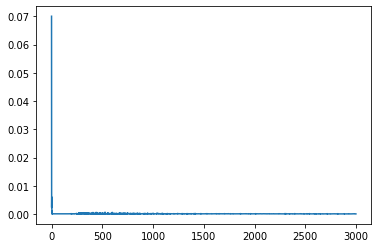

In [8]:
ax = plt.figure().add_subplot()
ax.plot(range(len(mean_squared_error)),val_mean_squared_error,label='val')

In [9]:
pre = model.predict(Xtest, batch_size=BATCH_SIZE)
print(pre)

[[ 6.95105921e-03]
 [ 8.81413184e-03]
 [ 1.34127941e-02]
 [ 1.29766557e-02]
 [ 1.04837604e-02]
 [ 1.36363450e-02]
 [ 1.05128195e-02]
 [ 1.81578193e-02]
 [ 1.14197107e-02]
 [ 1.17256772e-04]
 [ 1.19137373e-02]
 [ 1.26814041e-02]
 [ 1.50619783e-02]
 [ 2.17601713e-02]
 [ 1.16706965e-02]
 [ 1.13221556e-02]
 [ 1.40884835e-02]
 [ 1.62627660e-02]
 [ 1.59888584e-02]
 [ 1.13388505e-02]
 [ 1.06567033e-02]
 [ 1.44850723e-02]
 [ 1.93333384e-02]
 [ 1.14523675e-02]
 [ 1.01646241e-02]
 [ 1.26210339e-02]
 [ 1.85704716e-02]
 [ 1.10628456e-02]
 [ 1.55225471e-02]
 [ 1.13857221e-02]
 [ 7.01309368e-03]
 [ 2.59985421e-02]
 [ 1.23011451e-02]
 [ 7.64194503e-03]
 [ 1.32360533e-02]
 [ 1.67968143e-02]
 [ 7.56901596e-03]
 [ 8.64448771e-03]
 [ 1.31262410e-02]
 [ 1.33173838e-02]
 [ 1.51083581e-02]
 [ 1.00879138e-02]
 [ 1.33854542e-02]
 [ 1.55132990e-02]
 [ 1.88959930e-02]
 [ 1.15407165e-02]
 [ 3.34126316e-03]
 [ 1.07773095e-02]
 [ 1.52681116e-02]
 [ 1.54512431e-02]
 [ 1.01634730e-02]
 [ 1.23326275e-02]
 [ 8.8152308

In [10]:
plt.figure()
plt.plot(pre[:,0],label='predctions',alpha=1)
plt.plot(Ytest[:,0],label='origin',alpha=0.5)
plt.legend(['predctions','origin'])


In [11]:
plt.figure(figsize=(12,5))
plt.subplot(211)
plt.plot(pre,label='predctions')
plt.subplot(212)
plt.plot(Ytest,label='origin')
plt.legend()
plt.show()

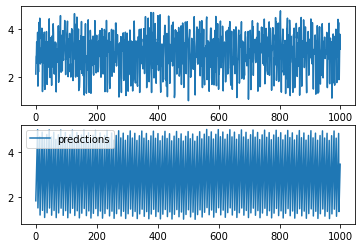

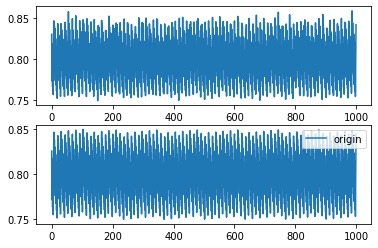

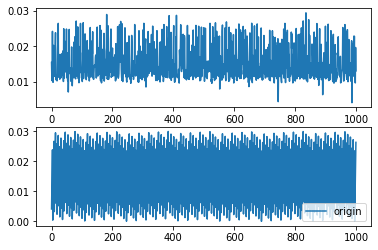